In [61]:
import numpy as nm 
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import print_function
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


In [62]:
crop = pd.read_csv("Crop_recommendation.csv")
crop.head

<bound method NDFrame.head of       Nitrogen  phosphorus  potassium  temperature   humidity        ph  \
0           90          42         43    20.879744  82.002744  6.502985   
1           85          58         41    21.770462  80.319644  7.038096   
2           60          55         44    23.004459  82.320763  7.840207   
3           74          35         40    26.491096  80.158363  6.980401   
4           78          42         42    20.130175  81.604873  7.628473   
...        ...         ...        ...          ...        ...       ...   
2195       107          34         32    26.774637  66.413269  6.780064   
2196        99          15         27    27.417112  56.636362  6.086922   
2197       118          33         30    24.131797  67.225123  6.362608   
2198       117          32         34    26.272418  52.127394  6.758793   
2199       104          18         30    23.603016  60.396475  6.779833   

        rainfall   label  Unnamed: 8  Unnamed: 9  
0     202.935536  

In [63]:
crop.shape

(2200, 10)

In [64]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   phosphorus   2200 non-null   int64  
 2   potassium    2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
dtypes: float64(6), int64(3), object(1)
memory usage: 172.0+ KB


In [65]:
crop.isnull().sum()

Nitrogen          0
phosphorus        0
potassium         0
temperature       0
humidity          0
ph                0
rainfall          0
label             0
Unnamed: 8     2200
Unnamed: 9     2200
dtype: int64

In [66]:
crop.duplicated().sum()

0

In [67]:
crop.dtypes

Nitrogen         int64
phosphorus       int64
potassium        int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
Unnamed: 8     float64
Unnamed: 9     float64
dtype: object

In [68]:
crop.describe()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,Unnamed: 8,Unnamed: 9
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,0.0,0.0
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,NaN,NaN
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,NaN,NaN
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,NaN,NaN
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,NaN,NaN
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,NaN,NaN
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,NaN,NaN
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,NaN,NaN


In [69]:
crop['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [70]:
crop.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [71]:
crop_dict={
    'rice': 1,
    'maize': 2,
    'chickpea': 3,
    'kidneybeans': 4,
    'pigeonpeas': 5,
    'mothbeans': 6,
    'mungbean':7,
    'blackgram':8,
    'lentil':9, 
    'pomegranate':10,
    'banana':11, 
    'mango':12, 
    'grapes':13,
    'watermelon':14,
    'muskmelon':15,
    'apple':16,
    'orange':17,
    'papaya':18,
    'coconut':19,
    'cotton':20,
    'jute':21,
    'coffee':22
}
crop['crop_num']= crop['label'].map(crop_dict)

In [72]:
crop['crop_num'].value_counts()

crop_num
1     100
2     100
21    100
20    100
19    100
18    100
17    100
16    100
15    100
14    100
13    100
12    100
11    100
10    100
9     100
8     100
7     100
6     100
5     100
4     100
3     100
22    100
Name: count, dtype: int64

In [73]:
crop

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,label,Unnamed: 8,Unnamed: 9,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,NaN,NaN,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,NaN,NaN,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,NaN,NaN,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,NaN,NaN,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,NaN,NaN,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,NaN,NaN,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,NaN,NaN,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,NaN,NaN,22


In [74]:
crop.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [75]:
x = crop[['Nitrogen','phosphorus','potassium','temperature','humidity','ph','rainfall']]
y = crop['label']

In [76]:
x.shape

(2200, 7)

In [77]:
y.shape

(2200,)

In [78]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [79]:
Xtrain.shape

(1760, 7)

In [80]:
Xtest.shape

(440, 7)

In [81]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

ms.fit(Xtrain)
Xtrain = ms.transform(Xtrain)
Xtest = ms.transform(Xtest)

In [82]:
Xtrain

array([[0.12142857, 0.07857143, 0.045     , ..., 0.9089898 , 0.48532225,
        0.29685161],
       [0.26428571, 0.52857143, 0.07      , ..., 0.64257946, 0.56594073,
        0.17630752],
       [0.05      , 0.48571429, 0.1       , ..., 0.57005802, 0.58835229,
        0.08931844],
       ...,
       [0.07857143, 0.22142857, 0.13      , ..., 0.43760347, 0.46198144,
        0.28719815],
       [0.07857143, 0.85      , 0.995     , ..., 0.76763665, 0.44420505,
        0.18346657],
       [0.22857143, 0.52142857, 0.085     , ..., 0.56099735, 0.54465022,
        0.11879596]])

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(Xtrain)
Xtrain = sc.transform(Xtrain)
Xtest = sc.transform(Xtest)

In [84]:
Xtrain

array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

<Axes: >

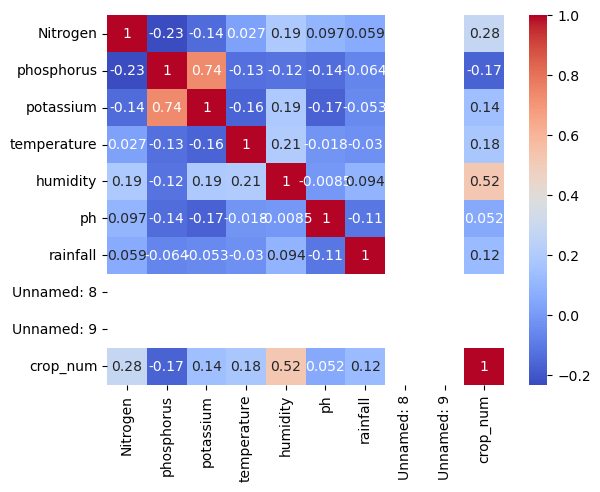

In [85]:
import seaborn as sns
numeric_crop = crop.select_dtypes(include='number')
corr_matrix = numeric_crop.corr()

sns.heatmap(corr_matrix,annot=True, cmap='coolwarm')


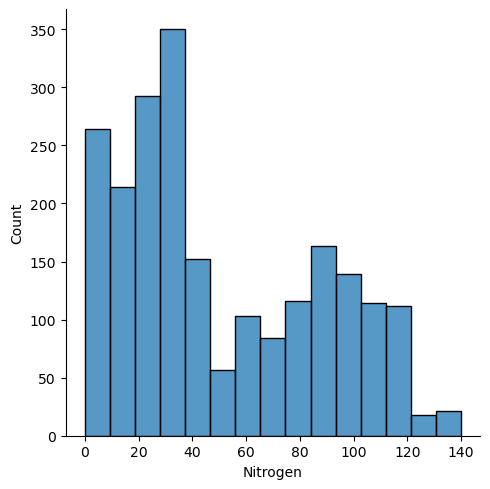

In [86]:
import seaborn as sns
sns.displot(crop['Nitrogen'])
plt.show()

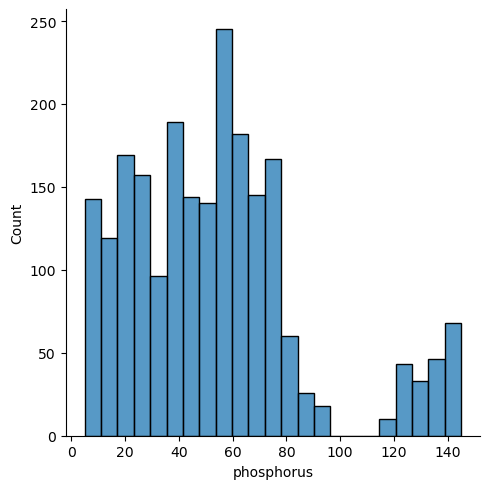

In [87]:
import seaborn as sns
sns.displot(crop['phosphorus'])
plt.show()

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

models = {
    'Logostoc Regression': LogisticRegression(),
    'Naive Bayes' : GaussianNB(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient BoostingC': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}



In [89]:
for name ,md in models.items():
    md.fit(Xtrain,Ytrain)
    y_pred = md.predict(Xtest)
    score = accuracy_score(Ytest,y_pred)
    print(f"{name} model with accuracy : {score}" )

Logostoc Regression model with accuracy : 0.9636363636363636
Naive Bayes model with accuracy : 0.9954545454545455
Support Vector Machine model with accuracy : 0.9681818181818181
K-Nearest Neighbors model with accuracy : 0.9568181818181818
Decision Tree model with accuracy : 0.9840909090909091
Random Forest model with accuracy : 0.9931818181818182
Gradient BoostingC model with accuracy : 0.9818181818181818
AdaBoost model with accuracy : 0.1409090909090909


In [90]:
randclf = RandomForestClassifier()
randclf.fit(Xtrain,Ytrain)
y_pred = randclf.predict(Xtest)
accuracy_score(Ytest,y_pred)

0.9931818181818182

In [91]:
def recommendation(Nitrogen, phosphorus, potassium, temperature, humidity, ph, rainfall):
    features = nm.array([[Nitrogen, phosphorus, potassium, temperature, humidity, ph, rainfall]])
    
    # Make a prediction using the trained model `randclf`
    prediction = randclf.predict(features).reshape(1, -1)
    
    # Debugging step: Print the predicted value
    #print("Predicted value:", prediction[0])
    
    return prediction[0]

In [92]:
Nitrogen = 85  #85,58,41,21.77046169,80.31964408,7.038096361,226.6555374
phosphorus= 58
potassium= 41
temperature= 21.77
humidity=80.3196
ph=7.1
rainfall=226.6
 
predict = recommendation(Nitrogen, phosphorus, potassium, temperature, humidity, ph,rainfall)

crop_dict={
    1:'rice', 2:'maize', 3:'chickpea', 4:'kidneybeans',5: 'pigeonpeas',
      6: 'mothbeans',7: 'mungbean',8: 'blackgram',9: 'lentil',10: 'pomegranate',
       11: 'banana',12: 'mango',13: 'grapes',14: 'watermelon', 15:'muskmelon',16: 'apple',
      17: 'orange', 18:'papaya', 19:'coconut', 20:'cotton', 21:'jute',22: 'coffee'
}

predicted_crop = predict[0]
if predicted_crop in crop_dict.values():  # Check if the predicted crop is in the crop_dict values
    print("{} is the best crop to be cultivated.".format(predicted_crop))

#if predict[0] in crop_dict:
   #crop = crop_dict [predict]
  # print("{} is a best crop to be cultivated ".format(crop))
else: 
   print("Sorry are not able to recommend a proper crop for this environment")


apple is the best crop to be cultivated.


In [93]:
import pickle
pickle.dump(randclf,open('model.pkl' , 'wb'))